In [1]:
import uproot
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [3]:
num_round_polm80=400
num_round_polp80=400
num_plot_polm80_min=0
num_plot_polm80_max=0
num_plot_polp80_min=0
num_plot_polp80_max=0

In [31]:
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
file_polm80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364.root")
file_polm80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13391.root")
file_polm80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13399_to_13402.root")
file_polm80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13394_to_13397.root")
file_polm80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polm80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14734.root")
file_polm80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14726.root")


tree_polm80_hhz_signal = file_polm80_hhz_signal["MVATrainingVariables"]
tree_polm80_hhz_signal.keys()
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_ee_qq_BG = file_polm80_ee_qq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqq_BG = file_polm80_ee_qqqq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqqqq_BG = file_polm80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polm80_WWH_qqqqH_BG = file_polm80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polm80_ZZH_qqqqH_BG = file_polm80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
#feature: jet6_theta, importance: 0.006951884366571903
#feature: jet4_theta, importance: 0.0081394137814641
#feature: jet5_theta, importance: 0.008377623744308949
#feature: jet4_E, importance: 0.008673656731843948
#feature: comb_jet2_BTagMax, importance: 0.008875861763954163
#feature: jet3_E, importance: 0.009489532560110092

#feature: jet6_theta, importance: 0.007176658604294062
#feature: jet4_E, importance: 0.007868878543376923
#feature: jet5_theta, importance: 0.00789350364357233
#feature: jet4_theta, importance: 0.00875063892453909
#feature: comb_jet3_BTagMax, importance: 0.009214065968990326
#feature: comb_jet2_BTagMax, importance: 0.009325340390205383


df_polm80_HHZ=tree_polm80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#df_polm80_HHZ=df_polm80_HHZ.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
df_polm80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polm80_HHZ.index)
df_polm80_HHZ.to_csv("dataframe_polm80_SIG.csv")
df_polm80_BG=tree_polm80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#drop less important features <1 % and check
df_polm80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polm80_BG.index)
df_polm80_ee_qq=tree_polm80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polm80_ee_qq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qq,ignore_index=True)
df_polm80_ee_qqqq=tree_polm80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polm80_ee_qqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqq,ignore_index=True)
df_polm80_ee_qqqqqq=tree_polm80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polm80_ee_qqqqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqqqq,ignore_index=True)
df_polm80_WWH_qqqqH=tree_polm80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polm80_WWH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_WWH_qqqqH,ignore_index=True)
df_polm80_ZZH_qqqqH=tree_polm80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polm80_ZZH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ZZH_qqqqH,ignore_index=True)
#df_polm80_BG=df_polm80_BG.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
#polm80 after loop best result now for thresh 0 1.9231107313597056 7.1626043831929564 6.709212450077757
#using ALL the variables
#Sig, BG, sum, metric 4.672464674082233 9.709791960194707 14.489369597285986 24.199161557480693 1.973830090641824 1.9844308321733362
#but also that
#polm80 after loop best result now for thresh 0 2.0675560241257993 4.746041810140014 0.5232050677295774



#drop weight column here
Y_polm80_HHZ=np.ones((df_polm80_HHZ.shape[0],1))
#print("shape of data frame BG after",df_polm80_BG.shape,df_polm80_BG.tail())
Y_polm80_BG=np.zeros((df_polm80_BG.shape[0],1))
#print ("polm80 shape of Ysig, back",Y_polm80_HHZ.shape,Y_polm80_BG.shape)
df_polm80_HHZ.head()
df_polm80_total=df_polm80_HHZ.append(df_polm80_BG,ignore_index=True)



y_polm80_total=np.append(Y_polm80_HHZ,Y_polm80_BG)
X_polm80_total=np.asarray(df_polm80_total)
test_size_polm80=0.2
X_polm80_train, X_polm80_test, y_polm80_train, y_polm80_test = train_test_split(df_polm80_total, y_polm80_total, test_size=test_size_polm80)
print("polm80 shape of X_train/X_test/y_train/y_test",X_polm80_train.shape, X_polm80_test.shape, y_polm80_train.shape, y_polm80_test.shape)

sel_HHZ_polm80_train=X_polm80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_train=X_polm80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_train=X_polm80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_train=X_polm80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_train=X_polm80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_train=X_polm80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_train=X_polm80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polm80_test=X_polm80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_test=X_polm80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_test=X_polm80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_test=X_polm80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_test=X_polm80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_test=X_polm80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_test=X_polm80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

#last 7 columns should be all labelling of the different samples, so take it out to define the matrix
data_polm80_train=X_polm80_train.iloc[:,1:-7]

weight_polm80_train = X_polm80_train.iloc[:,0]
weight_polm80_test = X_polm80_test.iloc[:,0]
weight_polm80_array_test=np.asarray(weight_polm80_test)
weight_polm80_array_train=np.asarray(weight_polm80_train)

weights_polm80_test_B=np.ma.masked_where(y_polm80_test==1,weight_polm80_array_test)
weights_polm80_test_S=np.ma.masked_where(y_polm80_test==0,weight_polm80_array_test)
#print("test all weights",np.sum(weight_polm80_array_test),np.sum(weights_polm80_test_B),np.sum(weights_polm80_test_S))

sum_wpos_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_tot_hhz_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_HHZ_polm80_train[i]==1)
sum_tot_hzqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_hzqq_polm80_train[i]==1)
sum_tot_ee_qq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qq_polm80_train[i]==1)
sum_tot_ee_qqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqq_polm80_train[i]==1)
sum_tot_ee_qqqqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqqqq_polm80_train[i]==1)
sum_tot_WWH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_WWH_qqqqH_polm80_train[i]==1)
sum_tot_ZZH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ZZH_qqqqH_polm80_train[i]==1)

sum_tot_hhz_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_HHZ_polm80_test[i]==1)
sum_tot_hzqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_hzqq_polm80_test[i]==1)
sum_tot_ee_qq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qq_polm80_test[i]==1)
sum_tot_ee_qqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqq_polm80_test[i]==1)
sum_tot_ee_qqqqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqqqq_polm80_test[i]==1)
sum_tot_WWH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_WWH_qqqqH_polm80_test[i]==1)
sum_tot_ZZH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ZZH_qqqqH_polm80_test[i]==1)


sum_wpos_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
recale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
recale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

scale_pos_weight_train_polm80 = sum_wneg_train_polm80/sum_wpos_train_polm80
data_polm80_test=X_polm80_test.iloc[:,1:-7]

polm80 shape of X_train/X_test/y_train/y_test (82924, 41) (20732, 41) (82924,) (20732,)


In [ ]:
xgmat_polm80_train = xgb.DMatrix( data_polm80_train, label=y_polm80_train, missing = -999.0, weight=weight_polm80_train )
xgmat_polm80_test = xgb.DMatrix( data_polm80_test, missing = -999.0, weight=weight_polm80_test )
watchlist_polm80 = [(xgmat_polm80_train, 'train'), (xgmat_polm80_test , 'validation')]
#param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
#                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
#                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.01, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
               'gamma': 0.0, 'min_child_weight': 1.0,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
#    parameters = {
#        'num_boost_round': [100, 250, 500],
#        'eta': [0.05, 0.1, 0.3],
#        'max_depth': [6, 9, 12],
#        'subsample': [0.9, 1.0],
#        'colsample_bytree': [0.9, 1.0],
#    }
#    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=2)



print("before training polm80")
XGB_Model_polm80 =xgb.train(param_polm80,xgmat_polm80_train,num_boost_round=num_round_polm80,verbose_eval=True)
print("after training polm80")

In [ ]:
XGB_Model_polm80.save_model("/Users/matthiasweber/jupytermacros/HHZModel_polm80.model")
modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
print('model saved')
cross_val_polm80 = xgb.cv(param_polm80,xgmat_polm80_train, num_boost_round=num_round_polm80, nfold=10, early_stopping_rounds=10, metrics=['error','auc'], verbose_eval=True)

if XGB_Model_polm80.best_ntree_limit != num_round_polm80 :
    print("after training polpm0 found cutoff",XGB_Model_polm80.best_score,XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)
else:
    print("after training polm80",XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)

In [38]:
XGB_Model_polm80_sklearn =xgb.XGBClassifier()
param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':0.8,'max_delta_step':0,'max_depth': 6, 
                    'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 
                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                    'gamma': 0.0, 'min_child_weight': 1.0,'reg_lambda': 1.0, 'reg_alpha': 0.0,'tree_method':'exact',
                    'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
                    'n_estimators': num_round_polm80}
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 9, 
#                    'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0.3, 'min_child_weight': 5.5,'reg_lambda': 5.0, 'reg_alpha': 0,'tree_method':'exact',
#                   'subsample':0.8,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
XGB_Model_polm80_sklearn.set_params(**param_polm80_skl)
#XGB_Model_polm80_sklearn.set_params(random_state=7,tree_method="exact",max_delta_step=0,n_estimators =num_round_polm80, scale_pos_weight=scale_pos_weight_train_polm80, max_depth=6, learning_rate=0.05, objective='binary:logitraw',n_jobs=4, verbosity=2,importance_type="gain",
#                                            gamma= 0, min_child_weight=1,reg_lambda= 1,reg_alpha=0,base_score=0.5,
#                                    subsample=1,colsample_bytree=1,colsample_bylevel=1,colsample_bynode=1.0)
print("before fittin sklearn polm80")
#XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, early_stopping_rounds=10)
XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, sample_weight_eval_set=[weight_polm80_train,weight_polm80_test],eval_metric= ['error','auc'],eval_set=[(data_polm80_train,y_polm80_train),(data_polm80_test,y_polm80_test)], early_stopping_rounds=10)
print("after fitting sklearn polm80",XGB_Model_polm80_sklearnfit.best_score,XGB_Model_polm80_sklearnfit.best_ntree_limit,XGB_Model_polm80_sklearnfit.best_iteration)
#evals_result_polm80_sklearn = XGB_Model_polm80_sklearn.evals_result()
XGB_Model_polm80_sklearn_le = LabelEncoder().fit(y_polm80_test)
#ypred_polm80_test_skl_1 = XGB_Model_polm80_sklearn.predict(data_polm80_test)
modelfile_polm80_sklearn="/Users/matthiasweber/jupytermacros/HHZModel_polm80_skl_BTag3_2_20.model"
XGB_Model_polm80_sklearn.save_model(modelfile_polm80_sklearn)
#print("eval results",evals_result_polm80_sklearn)
#print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)

before fittin sklearn polm80
[16:59:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-error:0.001937	validation_0-auc:0.886856	validation_1-error:0.001998	validation_1-auc:0.855558
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[16:59:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-error:0.001937	validation_0-auc:0.90238	validation_1-error:0.001998	validation_1-auc:0.873054
[16:59:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-error:0.001937	validation_0-auc:0.906911	validation_1-error:0.001998	validation_1-auc:0.877137
[16:59:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]

[17:00:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[35]	validation_0-error:0.008401	validation_0-auc:0.921167	validation_1-error:0.006745	validation_1-auc:0.889208
[17:00:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[36]	validation_0-error:0.009478	validation_0-auc:0.921385	validation_1-error:0.00828	validation_1-auc:0.889388
[17:00:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[37]	validation_0-error:0.010535	validation_0-auc:0.92158	validation_1-error:0.009218	validation_1-auc:0.88959
[17:00:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[38]	validation_0-error:0.011433	validation_0-auc:0.921814	validation_1-error:0.010384	validation_1-auc:0.889837
[17:00:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1

[17:00:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[71]	validation_0-error:0.037476	validation_0-auc:0.928109	validation_1-error:0.046408	validation_1-auc:0.894601
[17:00:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[72]	validation_0-error:0.038048	validation_0-auc:0.928283	validation_1-error:0.047397	validation_1-auc:0.894694
[17:00:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[73]	validation_0-error:0.038439	validation_0-auc:0.9285	validation_1-error:0.047621	validation_1-auc:0.894878
[17:00:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[74]	validation_0-error:0.038795	validation_0-auc:0.92869	validation_1-error:0.047842	validation_1-auc:0.895109
[17:00:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1

[17:00:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[107]	validation_0-error:0.047183	validation_0-auc:0.934576	validation_1-error:0.058501	validation_1-auc:0.899843
[17:00:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[108]	validation_0-error:0.047357	validation_0-auc:0.934686	validation_1-error:0.05892	validation_1-auc:0.89996
[17:00:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[109]	validation_0-error:0.047284	validation_0-auc:0.934835	validation_1-error:0.059173	validation_1-auc:0.900008
[17:00:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[110]	validation_0-error:0.047492	validation_0-auc:0.935017	validation_1-error:0.059221	validation_1-auc:0.90013
[17:00:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[17:01:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[143]	validation_0-error:0.051926	validation_0-auc:0.939958	validation_1-error:0.062282	validation_1-auc:0.904678
[17:01:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[144]	validation_0-error:0.051971	validation_0-auc:0.940082	validation_1-error:0.062261	validation_1-auc:0.904786
[17:01:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[145]	validation_0-error:0.052059	validation_0-auc:0.940215	validation_1-error:0.062416	validation_1-auc:0.904905
[17:01:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[146]	validation_0-error:0.052027	validation_0-auc:0.940365	validation_1-error:0.06322	validation_1-auc:0.905071
[17:01:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[17:01:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[179]	validation_0-error:0.053766	validation_0-auc:0.944202	validation_1-error:0.065723	validation_1-auc:0.908194
[17:01:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[180]	validation_0-error:0.053638	validation_0-auc:0.944322	validation_1-error:0.065801	validation_1-auc:0.908276
[17:01:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[181]	validation_0-error:0.053697	validation_0-auc:0.944414	validation_1-error:0.064826	validation_1-auc:0.908335
[17:01:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[182]	validation_0-error:0.053741	validation_0-auc:0.944517	validation_1-error:0.065856	validation_1-auc:0.908409
[17:01:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[17:01:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[215]	validation_0-error:0.053707	validation_0-auc:0.94786	validation_1-error:0.067487	validation_1-auc:0.911522
[17:01:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[216]	validation_0-error:0.053768	validation_0-auc:0.947956	validation_1-error:0.067528	validation_1-auc:0.91153
[17:01:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[217]	validation_0-error:0.053806	validation_0-auc:0.948062	validation_1-error:0.06774	validation_1-auc:0.911643
[17:01:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[218]	validation_0-error:0.053769	validation_0-auc:0.94815	validation_1-error:0.067844	validation_1-auc:0.911743
[17:01:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[17:02:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[251]	validation_0-error:0.053631	validation_0-auc:0.951213	validation_1-error:0.06935	validation_1-auc:0.914299
[17:02:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[252]	validation_0-error:0.05367	validation_0-auc:0.951316	validation_1-error:0.069278	validation_1-auc:0.914363
[17:02:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[253]	validation_0-error:0.053615	validation_0-auc:0.951399	validation_1-error:0.069427	validation_1-auc:0.914392
[17:02:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[254]	validation_0-error:0.053669	validation_0-auc:0.951536	validation_1-error:0.069365	validation_1-auc:0.914438
[17:02:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[17:02:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[287]	validation_0-error:0.053229	validation_0-auc:0.954303	validation_1-error:0.06973	validation_1-auc:0.916485
[17:02:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[288]	validation_0-error:0.053205	validation_0-auc:0.954362	validation_1-error:0.069615	validation_1-auc:0.916529
[17:02:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[289]	validation_0-error:0.053179	validation_0-auc:0.954457	validation_1-error:0.069569	validation_1-auc:0.916601
[17:02:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[290]	validation_0-error:0.053123	validation_0-auc:0.954514	validation_1-error:0.06965	validation_1-auc:0.916653
[17:02:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[17:02:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[323]	validation_0-error:0.053031	validation_0-auc:0.957055	validation_1-error:0.068631	validation_1-auc:0.918498
[17:02:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[324]	validation_0-error:0.052992	validation_0-auc:0.957135	validation_1-error:0.068712	validation_1-auc:0.918564
[17:02:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[325]	validation_0-error:0.053014	validation_0-auc:0.95721	validation_1-error:0.0689	validation_1-auc:0.918628
[17:02:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[326]	validation_0-error:0.053009	validation_0-auc:0.957273	validation_1-error:0.069023	validation_1-auc:0.918619
[17:02:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[17:03:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[359]	validation_0-error:0.05225	validation_0-auc:0.959571	validation_1-error:0.070631	validation_1-auc:0.920382
[17:03:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[360]	validation_0-error:0.052202	validation_0-auc:0.959619	validation_1-error:0.070534	validation_1-auc:0.920429
[17:03:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[361]	validation_0-error:0.052271	validation_0-auc:0.95972	validation_1-error:0.070621	validation_1-auc:0.920483
[17:03:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[362]	validation_0-error:0.052217	validation_0-auc:0.959821	validation_1-error:0.070605	validation_1-auc:0.920575
[17:03:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[17:03:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[395]	validation_0-error:0.051928	validation_0-auc:0.961763	validation_1-error:0.070714	validation_1-auc:0.921777
[17:03:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[396]	validation_0-error:0.051983	validation_0-auc:0.961791	validation_1-error:0.070677	validation_1-auc:0.921791
[17:03:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[397]	validation_0-error:0.051879	validation_0-auc:0.961884	validation_1-error:0.070678	validation_1-auc:0.92184
[17:03:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[398]	validation_0-error:0.051835	validation_0-auc:0.961968	validation_1-error:0.070721	validation_1-auc:0.921883
[17:03:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':0.8,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polm80,
                           'n_estimators': 10,
                           'gamma': 0, 'learning_rate': 0.05,'reg_lambda': 1,'reg_alpha': 0,'colsample_bytree':1
                          }
param_polm80_grid = {
    'max_depth': [4,5,6,7,8],
    'min_child_weight': [1,3,5,7]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.grid_scores_, gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polm80,'max_depth': 7, 'min_child_weight': 7,
                           #'n_estimators': 10,
                           'gamma': 0, 'colsample_bytree':1,
                           'learning_rate': 0.05,
                           'reg_lambda': 1
                           ,'reg_alpha': 0
                          }
param_polm80_grid = {
    'gamma': [0,0.1,0.2,0.33,0.4,0.5]
    'colsample_bytree': [0.5,0.7,0.8,1.0]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma: [0,0.1,0.2,0.33,0.4,0.5], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.cv_results_
gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polp80, 'max_depth': 9, 'min_child_weight': 3,
                           #'n_estimators': 10,
                           'gamma': 0.33, 'colsample_bytree':0.5,'learning_rate': 0.15,'reg_lambda': 1,'reg_alpha': 1
                          }
param_polp80_grid = {
    'learning_rate': [0.05,0.10,0.15,0.20],
    'reg_alpha': [0,0.2,0.3,0.4,0.5, 1]
}
    
#param_polp80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.cv_results_
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

In [39]:
bst_polm80_sklearn = xgb.XGBClassifier()
bst_polm80_sklearn.load_model(modelfile_polm80_sklearn)
bst_polm80_sklearn._le = LabelEncoder().fit(y_polm80_test)
print("predict test")
ypred_polm80_test_skl = bst_polm80_sklearn.predict(data_polm80_test,output_margin=True)
print("predict train")
ypred_polm80_train_skl = bst_polm80_sklearn.predict(data_polm80_train,output_margin=True)
#print("eval results",evals_result_polm80_sklearn)
print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)
ordered_features_polm80=zip(data_polm80_train.columns, XGB_Model_polm80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polm80=sorted(ordered_features_polm80,key = lambda z: z[1])
importance_list_sorted_polm80=XGB_Model_polm80_sklearn.feature_importances_
importance_list_sorted_polm80=sorted(importance_list_sorted_polm80)
for t in importance_list_sorted_polm80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_S),np.max(ypred_polm80_test_skl_S))

test_bins_BDT_polm80=200
range_pred_polm80=np.max(ypred_polm80_train_skl_S)-np.min(ypred_polm80_train_skl_S)
pred_lim_polm80= np.linspace(np.min(ypred_polm80_train_skl_S)+0.50*range_pred_polm80,np.min(ypred_polm80_train_skl_S)+0.95*range_pred_polm80,test_bins_BDT_polm80, endpoint=True)
max_sig_polm80_skl=0
max_sig_polm80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polm80)):
    count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    print("Sig, BG, sum, metric",pred_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
    if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)>0 and (1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl :
        max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
        max_sig_polm80_skl_j=j       
        SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
        BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
print("polm80 threshold 0",pred_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j,"result",max_sig_polm80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polm80:
    print("begin of polm80 threshold",importance)
    # select features using threshold
    selection_polm80 = SelectFromModel(XGB_Model_polm80_sklearn, threshold=importance, prefit=True)
    select_X_train_polm80 = selection_polm80.transform(data_polm80_train)
    # train model
    selection_model_polm80 = xgb.XGBClassifier()
    selection_model_polm80.fit(select_X_train_polm80, y_polm80_train)
    # eval model
    select_X_test_polm80 = selection_polm80.transform(data_polm80_test)
    ypred_sel_polm80_test_skl = selection_model_polm80.predict(select_X_test_polm80,output_margin=True)
    ypred_sel_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_sel_polm80_test_skl)
    range_sel_pred_polm80=np.max(ypred_sel_polm80_test_skl_S)-np.min(ypred_sel_polm80_test_skl_S)
    pred_sel_lim_polm80= np.linspace(np.min(ypred_sel_polm80_test_skl_S)+0.70*range_sel_pred_polm80,np.min(ypred_sel_polm80_test_skl_S)+0.95*range_sel_pred_polm80,test_bins_BDT_polm80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polm80)):
        count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
        if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl) and ((1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl):
            max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
            max_sig_polm80_skl_j=j
            SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
            BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
            best_threshold=importance
    print("polm80 threshold",importance,pred_sel_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j," best thresh",best_threshold,"results",max_sig_polm80_skl,SIG_j,BG_j)
"""
print("polm80 after loop best result now for thresh",best_threshold,max_sig_polm80_skl,SIG_j,BG_j)

predict test
predict train
feature importance [0.0650463  0.02913021 0.01688094 0.01281129 0.01049313 0.03376708
 0.02661062 0.03335362 0.01818931 0.03544368 0.02308981 0.0186779
 0.01926007 0.03363983 0.02146203 0.019144   0.0329403  0.01707197
 0.01549123 0.18239798 0.1309327  0.01911396 0.03011295 0.01995816
 0.01973253 0.01740694 0.02091992 0.0256492  0.01416955 0.010015
 0.00859618 0.00914261 0.00934897]
threshold 0.00859618
threshold 0.009142611
threshold 0.009348967
threshold 0.010015002
threshold 0.010493132
threshold 0.012811291
threshold 0.014169553
threshold 0.015491229
threshold 0.016880935
threshold 0.017071966
threshold 0.017406939
threshold 0.018189313
threshold 0.018677903
threshold 0.019113956
threshold 0.019144004
threshold 0.019260073
threshold 0.019732533
threshold 0.01995816
threshold 0.02091992
threshold 0.021462027
threshold 0.02308981
threshold 0.025649201
threshold 0.02661062
threshold 0.02913021
threshold 0.030112952
threshold 0.032940302
threshold 0.033353616

Sig, BG, sum, metric 1.270847783016799 20.00739643815905 406.2069917365443 426.21438817470334 0.9691176970756462 0.9631036651465543
Sig, BG, sum, metric 1.286038598582972 19.98562560416758 399.270324211102 419.25594981526956 0.976063629312563 0.9691176970756462
Sig, BG, sum, metric 1.3012294141491454 19.855000600218773 395.8389821124729 415.69398271269165 0.9738297446940117 0.976063629312563
Sig, BG, sum, metric 1.3164202297153185 19.833229766227305 387.81018631067127 407.6434160768986 0.9823205443039309 0.976063629312563
Sig, BG, sum, metric 1.3316110452814915 19.637292260304093 371.40858535654843 391.0458776168525 0.9930422988859942 0.9823205443039309
Sig, BG, sum, metric 1.3468018608476648 19.593750592321157 364.81279493076727 384.4065455230884 0.9993605201943138 0.9930422988859942
Sig, BG, sum, metric 1.3619926764138377 19.506667256355286 357.2024801012594 376.7091473576147 1.0050322384705421 0.9993605201943138
Sig, BG, sum, metric 1.377183491980011 19.419583920389414 350.316148734

Sig, BG, sum, metric 2.2278691636857073 12.997187892906368 39.34292918886058 52.34011708176695 1.7965199835458663 1.7230950610313338
Sig, BG, sum, metric 2.24305997925188 12.931875390931964 37.847607870353386 50.77948326128535 1.8147523715541787 1.7965199835458663
Sig, BG, sum, metric 2.2582507948180535 12.86656288895756 37.828384588938206 50.69494747789577 1.8070917714641683 1.8147523715541787
Sig, BG, sum, metric 2.2734416103842268 12.75770871900022 37.80916130752303 50.56687002652325 1.7940710815375158 1.8147523715541787
Sig, BG, sum, metric 2.2886324259504 12.627083715051413 37.14796899468638 49.77505270973779 1.7897698816027285 1.8147523715541787
Sig, BG, sum, metric 2.3038232415165734 12.583542047068477 37.10952243185602 49.6930644789245 1.785069027911542 1.8147523715541787
Sig, BG, sum, metric 2.319014057082746 12.518229545094073 35.59485828853212 48.113087833626196 1.8047260859260381 1.8147523715541787
Sig, BG, sum, metric 2.334204872648919 12.474687877111137 33.565513289067894

Sig, BG, sum, metric 3.2000813599207887 4.550104304216802 1.7240493453573436 6.274153649574146 1.8165350303505197 1.9111805739768575
Sig, BG, sum, metric 3.215272175486962 4.46302096825093 1.2419084541033953 5.704929422354326 1.8685459804471218 1.9111805739768575
Sig, BG, sum, metric 3.2304629910531353 4.332395964302123 1.222685172688216 5.555081136990339 1.8381584258450667 1.9111805739768575
Sig, BG, sum, metric 3.245653806619308 4.071145956404507 1.222685172688216 5.293831129092723 1.769422848678331 1.9111805739768575
Sig, BG, sum, metric 3.2608446221854814 3.8969792844727635 0.09611640707589686 3.9930956915486604 1.9501734440170087 1.9111805739768575
Sig, BG, sum, metric 3.2760354377516547 3.744583446532488 0.09611640707589686 3.8406998536083847 1.9107256278569038 1.9501734440170087
Sig, BG, sum, metric 3.2912262533178276 3.5486459406092763 0.09611640707589686 3.644762347685173 1.8587803068960127 1.9501734440170087
Sig, BG, sum, metric 3.306417068884001 3.4615626046434045 0.09611640

In [34]:
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
file_polp80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365.root")
file_polp80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13392.root")
file_polp80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13398.root")
file_polp80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13393.root")
file_polp80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polp80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14735.root")
file_polp80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14727.root")


tree_polp80_hhz_signal = file_polp80_hhz_signal["MVATrainingVariables"]
tree_polp80_hhz_signal.keys()
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_ee_qq_BG = file_polp80_ee_qq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqq_BG = file_polp80_ee_qqqq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqqqq_BG = file_polp80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polp80_WWH_qqqqH_BG = file_polp80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polp80_ZZH_qqqqH_BG = file_polp80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
df_polp80_HHZ=tree_polp80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polp80_HHZ.index)
#df_polp80_HHZ=df_polp80_HHZ.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)

#df_polp80_HHZ.to_csv("dataframe_polp80_SIG.csv")
df_polp80_BG=tree_polp80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polp80_BG.index)
df_polp80_ee_qq=tree_polp80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polp80_ee_qq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qq,ignore_index=True)
df_polp80_ee_qqqq=tree_polp80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polp80_ee_qqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqq,ignore_index=True)
df_polp80_ee_qqqqqq=tree_polp80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polp80_ee_qqqqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqqqq,ignore_index=True)
df_polp80_WWH_qqqqH=tree_polp80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polp80_WWH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_WWH_qqqqH,ignore_index=True)
df_polp80_ZZH_qqqqH=tree_polp80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polp80_ZZH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ZZH_qqqqH,ignore_index=True)

#df_polp80_BG=df_polp80_BG.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)
#polp80 after loop best result now for thresh 0 0.9289984016367034 1.890362047124654 2.250207132892683

#all variables thres/sigma/signal/tot BG
#polp80 after loop best result now for thresh 0 0.9833914317534157 1.5114568790886551 0.8508628832350951

#drop weight column here
Y_polp80_HHZ=np.ones((df_polp80_HHZ.shape[0],1))
Y_polp80_BG=np.zeros((df_polp80_BG.shape[0],1))
df_polp80_total=df_polp80_HHZ.append(df_polp80_BG,ignore_index=True)
y_polp80_total=np.append(Y_polp80_HHZ,Y_polp80_BG)
X_polp80_total=np.asarray(df_polp80_total)

test_size_polp80=0.2
X_polp80_train, X_polp80_test, y_polp80_train, y_polp80_test = train_test_split(df_polp80_total, y_polp80_total, test_size=0.2, random_state=123)


sel_HHZ_polp80_train=X_polp80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_train=X_polp80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_train=X_polp80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_train=X_polp80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_train=X_polp80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_train=X_polp80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_train=X_polp80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polp80_test=X_polp80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_test=X_polp80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_test=X_polp80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_test=X_polp80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_test=X_polp80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_test=X_polp80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_test=X_polp80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

data_polp80_train=X_polp80_train.iloc[:,1:-7]
#data_polp80_train=X_polp80_train.iloc[:,1:]
weight_polp80_train = X_polp80_train.iloc[:,0]
weight_polp80_test = X_polp80_test.iloc[:,0]
weight_polp80_array_test=np.asarray(weight_polp80_test)
weight_polp80_array_train=np.asarray(weight_polp80_train)

weights_polp80_test_B=np.ma.masked_where(y_polp80_test==1,weight_polp80_array_test)
weights_polp80_test_S=np.ma.masked_where(y_polp80_test==0,weight_polp80_array_test)

sum_wpos_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 1.0)
sum_wneg_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 0.0)
sum_wpos_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 1.0)
sum_wneg_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
recale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
recale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

scale_pos_weight_train_polp80 = sum_wneg_train_polp80/sum_wpos_train_polp80
data_polp80_test=X_polp80_test.iloc[:,1:-7]

In [ ]:
xgmat_polp80_train = xgb.DMatrix( data_polp80_train, label=y_polp80_train, missing = -999.0, weight=weight_polp80_train )
xgmat_polp80_test = xgb.DMatrix( data_polp80_test, missing = -999.0, weight=weight_polp80_test )

watchlist_polp80 = [(xgmat_polp80_train, 'train'), (xgmat_polp80_test , 'validation')]
param_polp80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polp80, 'eval_metric': ['error','auc'],'evals': watchlist_polp80, 'early_stopping_round': 10,
                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
               'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
print("before training polp80")
num_round_polp80=30
XGB_Model_polp80 =xgb.train(param_polp80,xgmat_polp80_train,num_boost_round=num_round_polp80,verbose_eval=True)
if XGB_Model_polp80.best_ntree_limit != num_round_polp80 :
    print("after training polp80 found cutoff",XGB_Model_polp80.best_score,XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
else:
    print("after training polp80",XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
cross_val_polp80 = xgb.cv(param_polp80,xgmat_polp80_train, num_boost_round=num_round_polp80, nfold=10,early_stopping_rounds=10, metrics=['auc'], verbose_eval=True)
print("cross validation")
xgb.plot_importance(XGB_Model_polp80)
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="weight")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="cover")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="gain")
plt.show()

print("after crossvalidation polp80")
modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_test2.model'
XGB_Model_polp80.save_model(modelfile_polp80)
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80)
ypred_polp80_test = bst_polp80.predict( xgmat_polp80_test ,output_margin=True)
ypred_polp80_train = bst_polp80.predict( xgmat_polp80_train ,output_margin=True)

In [40]:
XGB_Model_polp80_sklearn =xgb.XGBClassifier()
param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':0.8,'max_delta_step':0,'max_depth': 6, 'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 'scale_pos_weight': scale_pos_weight_train_polp80,'early_stopping_round': 10,
                    'gamma': 0.0, 'min_child_weight': 1.0,'reg_lambda': 1.0, 'reg_alpha': 0.0,'tree_method':'exact','subsample':1,'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,'n_estimators': num_round_polp80}
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':0.8,'max_delta_step':0,'max_depth': 9, 'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 'scale_pos_weight': scale_pos_weight_train_polp80,'early_stopping_round': 10,
#                    'gamma': 0.2, 'min_child_weight': 4.5,'reg_lambda': 4.0, 'reg_alpha': 0.5,'tree_method':'exact','subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,'n_estimators': num_round_polp80}
XGB_Model_polp80_sklearn.set_params(**param_polp80_skl)
print("before fittin sklearn polp80")
XGB_Model_polp80_sklearnfit=XGB_Model_polp80_sklearn.fit(X=data_polp80_train, y=y_polp80_train, sample_weight=weight_polp80_train, sample_weight_eval_set=[weight_polp80_train,weight_polp80_test],eval_metric= ['error','auc'],eval_set=[(data_polp80_train,y_polp80_train),(data_polp80_test,y_polp80_test)], early_stopping_rounds=10)
print("after fitting sklearn polp80",XGB_Model_polp80_sklearnfit.best_score,XGB_Model_polp80_sklearnfit.best_ntree_limit,XGB_Model_polp80_sklearnfit.best_iteration)
evals_result_polp80_sklearn = XGB_Model_polp80_sklearn.evals_result()
modelfile_polp80_sklearn = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_skl_BTag3_2_20.model'
XGB_Model_polp80_sklearn.save_model(modelfile_polp80_sklearn)

before fittin sklearn polp80
[17:03:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-error:0.003522	validation_0-auc:0.884883	validation_1-error:0.003212	validation_1-auc:0.863893
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[17:03:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-error:0.003522	validation_0-auc:0.888092	validation_1-error:0.003212	validation_1-auc:0.867363
[17:03:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-error:0.003522	validation_0-auc:0.893769	validation_1-error:0.003212	validation_1-auc:0.873133
[17:03:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[3

[17:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[35]	validation_0-error:0.006591	validation_0-auc:0.919118	validation_1-error:0.007057	validation_1-auc:0.900012
[17:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[36]	validation_0-error:0.007122	validation_0-auc:0.919628	validation_1-error:0.007918	validation_1-auc:0.900379
[17:04:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[37]	validation_0-error:0.008439	validation_0-auc:0.920294	validation_1-error:0.008496	validation_1-auc:0.901083
[17:04:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[38]	validation_0-error:0.009296	validation_0-auc:0.920646	validation_1-error:0.009896	validation_1-auc:0.901284
[17:04:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[70]	validation_0-error:0.035292	validation_0-auc:0.930215	validation_1-error:0.034	validation_1-auc:0.908171
[17:04:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[71]	validation_0-error:0.035363	validation_0-auc:0.930406	validation_1-error:0.034168	validation_1-auc:0.908185
[17:04:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[72]	validation_0-error:0.035913	validation_0-auc:0.930601	validation_1-error:0.034661	validation_1-auc:0.908317
[17:04:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[73]	validation_0-error:0.036353	validation_0-auc:0.930803	validation_1-error:0.035207	validation_1-auc:0.90835
[17:04:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[74]	validation_0-error:0.036622	validation_0-auc:0.930965	validation_1-erro

[17:04:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[106]	validation_0-error:0.043225	validation_0-auc:0.936428	validation_1-error:0.044064	validation_1-auc:0.911732
[17:04:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[107]	validation_0-error:0.043484	validation_0-auc:0.936555	validation_1-error:0.044114	validation_1-auc:0.911802
[17:04:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[108]	validation_0-error:0.043643	validation_0-auc:0.936713	validation_1-error:0.044235	validation_1-auc:0.911895
[17:04:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[109]	validation_0-error:0.043981	validation_0-auc:0.936846	validation_1-error:0.044207	validation_1-auc:0.911944
[17:04:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[141]	validation_0-error:0.04779	validation_0-auc:0.941668	validation_1-error:0.049069	validation_1-auc:0.91559
[17:04:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[142]	validation_0-error:0.047722	validation_0-auc:0.941825	validation_1-error:0.049242	validation_1-auc:0.915745
[17:04:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[143]	validation_0-error:0.048081	validation_0-auc:0.942035	validation_1-error:0.049239	validation_1-auc:0.915874
[17:04:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[144]	validation_0-error:0.048007	validation_0-auc:0.942177	validation_1-error:0.049488	validation_1-auc:0.915917
[17:04:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[145]	validation_0-error:0.047951	validation_0-auc:0.942389	validation_

[17:04:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[177]	validation_0-error:0.050372	validation_0-auc:0.946258	validation_1-error:0.053543	validation_1-auc:0.919251
[17:04:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[178]	validation_0-error:0.050443	validation_0-auc:0.946373	validation_1-error:0.053372	validation_1-auc:0.919329
[17:04:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[179]	validation_0-error:0.050352	validation_0-auc:0.946504	validation_1-error:0.053372	validation_1-auc:0.919378
[17:04:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[180]	validation_0-error:0.050606	validation_0-auc:0.946644	validation_1-error:0.053673	validation_1-auc:0.91954
[17:04:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[212]	validation_0-error:0.05143	validation_0-auc:0.950052	validation_1-error:0.060921	validation_1-auc:0.92206
[17:04:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[213]	validation_0-error:0.051447	validation_0-auc:0.950144	validation_1-error:0.054967	validation_1-auc:0.922137
[17:04:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[214]	validation_0-error:0.051422	validation_0-auc:0.950245	validation_1-error:0.060989	validation_1-auc:0.922209
[17:04:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[215]	validation_0-error:0.051172	validation_0-auc:0.950348	validation_1-error:0.060738	validation_1-auc:0.922288
[17:04:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[216]	validation_0-error:0.051294	validation_0-auc:0.95048	validation_1-

[17:04:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[248]	validation_0-error:0.051118	validation_0-auc:0.953498	validation_1-error:0.06188	validation_1-auc:0.924977
[17:04:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[249]	validation_0-error:0.051144	validation_0-auc:0.95358	validation_1-error:0.062124	validation_1-auc:0.925044
[17:04:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[250]	validation_0-error:0.051124	validation_0-auc:0.953634	validation_1-error:0.062122	validation_1-auc:0.925084
[17:04:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[251]	validation_0-error:0.051053	validation_0-auc:0.953708	validation_1-error:0.062122	validation_1-auc:0.92516
[17:04:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1

[283]	validation_0-error:0.051788	validation_0-auc:0.956266	validation_1-error:0.063461	validation_1-auc:0.92724
[17:04:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[284]	validation_0-error:0.05189	validation_0-auc:0.956354	validation_1-error:0.063461	validation_1-auc:0.92732
[17:04:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[285]	validation_0-error:0.051932	validation_0-auc:0.95641	validation_1-error:0.063761	validation_1-auc:0.927343
[17:04:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[286]	validation_0-error:0.051734	validation_0-auc:0.956474	validation_1-error:0.063885	validation_1-auc:0.927432
[17:04:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[287]	validation_0-error:0.051906	validation_0-auc:0.956524	validation_1-err

[17:04:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[319]	validation_0-error:0.05163	validation_0-auc:0.958796	validation_1-error:0.064946	validation_1-auc:0.929421
[17:04:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[320]	validation_0-error:0.051675	validation_0-auc:0.958828	validation_1-error:0.06482	validation_1-auc:0.929442
[17:05:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[321]	validation_0-error:0.051789	validation_0-auc:0.958927	validation_1-error:0.064695	validation_1-auc:0.929491
[17:05:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[322]	validation_0-error:0.051686	validation_0-auc:0.958962	validation_1-error:0.064693	validation_1-auc:0.929538
[17:05:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[17:05:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[355]	validation_0-error:0.051134	validation_0-auc:0.961291	validation_1-error:0.071412	validation_1-auc:0.931354
[17:05:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[356]	validation_0-error:0.05116	validation_0-auc:0.961368	validation_1-error:0.071363	validation_1-auc:0.931417
[17:05:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[357]	validation_0-error:0.051191	validation_0-auc:0.961404	validation_1-error:0.071534	validation_1-auc:0.93146
[17:05:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[358]	validation_0-error:0.05103	validation_0-auc:0.961503	validation_1-error:0.071707	validation_1-auc:0.931522
[17:05:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[390]	validation_0-error:0.050799	validation_0-auc:0.963417	validation_1-error:0.070179	validation_1-auc:0.933034
[17:05:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[391]	validation_0-error:0.050902	validation_0-auc:0.963474	validation_1-error:0.07035	validation_1-auc:0.933076
[17:05:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[392]	validation_0-error:0.050791	validation_0-auc:0.963497	validation_1-error:0.07035	validation_1-auc:0.933116
[17:05:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[393]	validation_0-error:0.050932	validation_0-auc:0.963563	validation_1-error:0.070176	validation_1-auc:0.933188
[17:05:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[394]	validation_0-error:0.050723	validation_0-auc:0.963635	validation_1-

In [41]:
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
#print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted_polp80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_S),np.max(ypred_polp80_test_skl_S))

test_bins_BDT_polp80=200
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.95*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)
max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0:
        print("Sig, BG, sum, metric",pred_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0 and (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl :
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j       
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("polp80 threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polp80:
    print("begin of polp80 threshold",importance)
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.70*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.95*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl) and ((1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl):
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=j
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("polp80 threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)
"""
print("polp80 after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)

feature importance [0.04427093 0.03145265 0.01502191 0.01255761 0.00877197 0.02603143
 0.02546683 0.05733246 0.02919422 0.0377269  0.02390155 0.01349301
 0.0112895  0.01977394 0.02302621 0.01676851 0.02871616 0.01910322
 0.01393328 0.26310498 0.08002358 0.02503212 0.03050867 0.0191425
 0.01228249 0.01934103 0.01931635 0.02194782 0.01852776 0.00890483
 0.00812084 0.00891513 0.00699972]
threshold 0.00699972
threshold 0.008120836
threshold 0.008771969
threshold 0.008904832
threshold 0.008915131
threshold 0.011289502
threshold 0.012282492
threshold 0.012557613
threshold 0.01349301
threshold 0.013933276
threshold 0.015021908
threshold 0.016768511
threshold 0.018527765
threshold 0.019103218
threshold 0.0191425
threshold 0.019316351
threshold 0.019341027
threshold 0.019773938
threshold 0.02194782
threshold 0.023026211
threshold 0.023901548
threshold 0.02503212
threshold 0.025466826
threshold 0.026031427
threshold 0.02871616
threshold 0.029194223
threshold 0.03050867
threshold 0.03145265
thres

Sig, BG, sum, metric 1.157178144598726 3.4726034081541 42.241472024907125 45.714075433061225 0.513606151712868 0.5147547488026126
Sig, BG, sum, metric 1.1724965492085595 3.451784442877397 41.50344838795718 44.955232830834575 0.5148177846370012 0.5147547488026126
Sig, BG, sum, metric 1.187814953818393 3.4434568567667156 39.69331794825848 43.1367748050252 0.5242890778528978 0.5148177846370012
Sig, BG, sum, metric 1.2031333584282264 3.4226378914900124 39.69174828220275 43.114386173692765 0.5212545397223356 0.5242890778528978
Sig, BG, sum, metric 1.21845176303806 3.3976551331579685 39.392388322448824 42.79004345560679 0.5194071593219054 0.5242890778528978
Sig, BG, sum, metric 1.2337701676478936 3.3768361678812653 38.13363714405568 41.51047331193695 0.5241205016836 0.5242890778528978
Sig, BG, sum, metric 1.2490885722577272 3.3601809956599027 36.43548377483967 39.79566477049957 0.5326535052259269 0.5242890778528978
Sig, BG, sum, metric 1.2644069768675608 3.3476896164938807 35.928320034145145

Sig, BG, sum, metric 2.122237635018238 2.2401206637732685 8.935731274541467 11.175851938314736 0.6700868456189987 0.7042531661534221
Sig, BG, sum, metric 2.1375560396280715 2.2151379054412246 8.935731274541467 11.150869179982692 0.6633556131961443 0.7042531661534221
Sig, BG, sum, metric 2.1528744442379053 2.2151379054412246 8.720095423341263 10.935233328782488 0.6698641592803828 0.7042531661534221
Sig, BG, sum, metric 2.168192848847739 2.18599135405384 8.407384985184763 10.593376339238603 0.671631782413693 0.7042531661534221
Sig, BG, sum, metric 2.1835112534575725 2.1818275609984994 8.193318800040288 10.375146361038787 0.6773658655747081 0.7042531661534221
Sig, BG, sum, metric 2.198829658067406 2.152681009611115 7.978065483039245 10.13074649265036 0.6763304730791582 0.7042531661534221
Sig, BG, sum, metric 2.214148062677239 2.115206872113049 7.7698089776095 9.88501584972255 0.6727661993069508 0.7042531661534221
Sig, BG, sum, metric 2.229466467287073 2.090224113781005 7.7682555715728085 

Sig, BG, sum, metric 3.071978720827917 0.8494137832894921 0.933752039418323 1.783165822707815 0.6360971329980472 0.7309993421221599
Sig, BG, sum, metric 3.0872971254377504 0.8077758527360857 0.933752039418323 1.7415278921544086 0.6121046083759365 0.7309993421221599
Sig, BG, sum, metric 3.102615530047584 0.7869568874593824 0.7212555203295778 1.5082124077889603 0.6407958434506862 0.7309993421221599
Sig, BG, sum, metric 3.1179339346574175 0.7578103360719979 0.7196858542738482 1.4774961903458461 0.6234438420291468 0.7309993421221599
Sig, BG, sum, metric 3.133252339267251 0.7120086124632508 0.506002203328535 1.2180108157917857 0.6451484742174524 0.7309993421221599
Sig, BG, sum, metric 3.1485707438770847 0.7078448194079101 0.5044325372728053 1.2122773566807155 0.6428905784265944 0.7309993421221599
Sig, BG, sum, metric 3.163889148486918 0.7036810263525695 0.5028628712170757 1.2065438975696452 0.6406255821776987 0.7309993421221599
Sig, BG, sum, metric 3.179207553096752 0.6828620610758662 0.502

In [ ]:
"""
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
test_bins_BDT_polp80=100
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.99*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)

max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
for importance in importance_list_sorted_polp80:
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.50*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.99*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=   
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)

print("after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)
"""

In [ ]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':3, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'tree_method':'exact','subsample':0.8,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polp80,
                           'n_estimators': 10
                          }
    
param_polp80_grid = {'max_depth': [4,5,6,7,8,9], 'learning_rate': [0.01,0.05,0.10,0.15,0.20,0.25], 
                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,1.5,2,3,5],'reg_lambda':[0.5,1,2,4,6],'reg_alpha':[0,1e-5, 1e-3,1e-2, 0.1, 1, 2,10, 100],
                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

should be before classifier
non grid search parameters
after grid search parameter definition


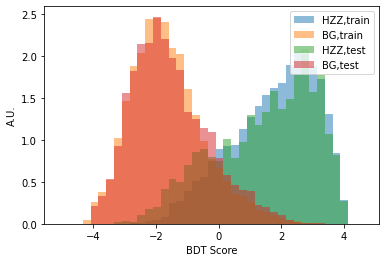

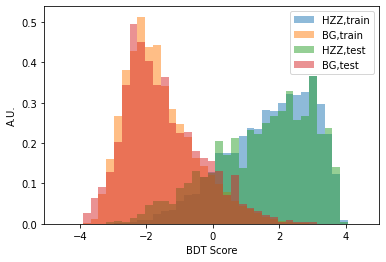

best result_polp80 sklo 2.750292224021413 Sig/BG  1.4948017068672925 1.0092960360343568 S/(S+B) 0.5969422364221196 S/sqrt(S+B) 0.9446217623498642
polp 80 numbers done
best result_polm80 sklo 2.6380211839723824 Sig/BG  10.04070863686502 17.09271971718408 S/(S+B) 0.37004939095234723 S/sqrt(S+B) 1.9275783034164589
5.0 1.25


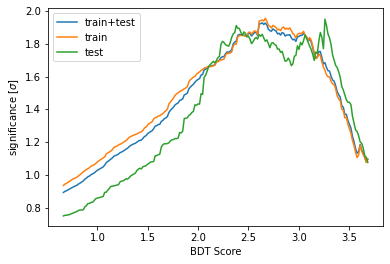

5.0 1.25


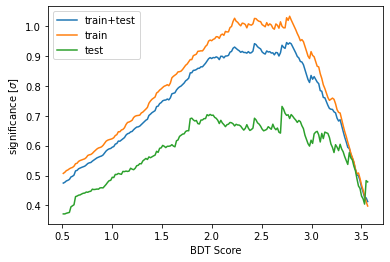

In [42]:
#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
rescale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
rescale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

ypred_polp80_test_skl_B=np.ma.masked_where(y_polp80_test==1,ypred_polp80_test_skl)
ypred_polp80_train_skl_B=np.ma.masked_where(y_polp80_train==1,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

ypred_polm80_test_skl_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test_skl)
ypred_polm80_train_skl_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train_skl)
ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_B),np.max(ypred_polp80_test_skl_B))

bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,40)   

num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_B),np.max(ypred_polm80_test_skl_B))

bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,40) 

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_test_skl_B))
ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))

ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_test_skl_B))
ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_test_skl_S))

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')    
plt.ylabel('A.U.')
plt.savefig("BDT_training_testing_polm80.pdf")
plt.show()

plt.figure(2)
hist_S_polp80_train_skl = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
hist_B_polp80_train_skl = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
hist_S_polp80_test_skl = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
hist_B_polp80_test_skl = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')
plt.ylabel('A.U.')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()

"""

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
  
bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,50)    
bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,50)  
    
#ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
#ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
print(ypred_polp80_train_skl_S)
#ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
#ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))
#for i in range(len(ypred_polp80_train_skl_B)):
#    print("B/S",ypred_polp80_train_skl_B[i],ypred_polp80_train_skl_S[i])

#ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
#ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))

rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
rescale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
rescale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()



print ('min/max B/S train/test',np.min(ypred_polp80_train_skl_B),np.max(ypred_polp80_train_skl_B),np.min(ypred_polp80_train_skl_S),np.max(ypred_polp80_train_skl_S),np.min(ypred_polp80_test_skl_B),np.max(ypred_polp80_test_skl_B),np.min(ypred_polp80_test_skl_S),np.max(ypred_polp80_test_skl_S))

#plt.figure(3)
#hist_S_polp80_train = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
##hist_B_polp80_train = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
#hist_S_polp80_test = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
#hist_B_polp80_test = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
#plt.show()
"""
count_sig_polp80_test_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test_skl=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_sig_polp80_test = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train = np.zeros(test_bins_BDT_polp80)

count_sig_polm80_test_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)

max_sig_polm80_skl=0
max_sig_polm80_skl_j=-1
max_sig_polp80_skl=0
max_sig_polp80_skl_j=-1




for j in range (len(pred_lim_polp80)):
    for i in range(len(y_polp80_test)):
        if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
        elif (sel_HHZ_polp80_test[i]!=1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
    for i in range(len(y_polp80_train)):
        if (sel_HHZ_polp80_train[i]==1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
        elif (sel_HHZ_polp80_train[i]!=1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
    #print("pred_lim",pred_lim_polp80[j],"all sig/test sig/train sig",(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]))
    if (count_sig_polp80_test_skl[j]+count_BG_polp80_test_skl[j])>0 and ((count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]) )>max_sig_polp80_skl :
        max_sig_polp80_skl=(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j])
        max_sig_polp80_skl_j=j
print("best result_polp80 sklo",pred_lim_polp80[max_sig_polp80_skl_j],'Sig/BG ',count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j],count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j],"S/(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]),"S/sqrt(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/math.sqrt(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]))
print ("polp 80 numbers done")



for j in range (len(pred_lim_polm80)):
    for i in range(len(y_polm80_test)):
        if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_test_skl[j]+=weight_polm80_array_test.item(i) 
        elif (sel_HHZ_polm80_test[i]!=1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_test_skl[j]+=weight_polm80_array_test.item(i)
    for i in range(len(y_polm80_train)):
        if (sel_HHZ_polm80_train[i]==1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
        elif (sel_HHZ_polm80_train[i]!=1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
    if ((count_sig_polm80_test_skl[j]+count_BG_polm80_test_skl[j])>0 and (((count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j]))>max_sig_polm80_skl)):
        max_sig_polm80_skl=(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j])
        max_sig_polm80_skl_j=j
        #print("in",j,"limit polm80 sklo new best value",pred_lim_polm80[max_sig_polm80_skl_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j],count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
print("best result_polm80 sklo",pred_lim_polm80[max_sig_polm80_skl_j],"Sig/BG "
      ,count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]
      ,count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],"S/(S+B)",
      (count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),
      "S/sqrt(S+B)",(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
        
#sig=S/sqrt(s+b)
f_test_polm80=1./test_size_polm80
f_train_polm80=1./(1.-test_size_polm80)
print(1./test_size_polm80,1./(1.-test_size_polm80))
sign_polm80_tot= np.divide(np.add(count_sig_polm80_test_skl,count_sig_polm80_train_skl),np.sqrt(np.add(np.add(count_sig_polm80_test_skl,count_sig_polm80_train_skl),np.add(count_BG_polm80_test_skl,count_BG_polm80_train_skl))))
sign_polm80_train= np.divide(f_train_polm80*count_sig_polm80_train_skl,np.sqrt(np.add(f_train_polm80*count_sig_polm80_train_skl,f_train_polm80*count_BG_polm80_train_skl)))
sign_polm80_test= np.divide(f_test_polm80*count_sig_polm80_test_skl,np.sqrt(np.add(f_test_polm80*count_sig_polm80_test_skl,f_test_polm80*count_BG_polm80_test_skl)))

plt.plot(pred_lim_polm80,sign_polm80_tot,label='train+test')
plt.plot(pred_lim_polm80,sign_polm80_train,label='train')
plt.plot(pred_lim_polm80,sign_polm80_test,label='test')
plt.legend(loc="upper left")
plt.xlabel('BDT Score')
plt.ylabel(r'significance [$\sigma$]')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()
#sig=S/sqrt(s+b)
f_test_polp80=1./test_size_polp80
f_train_polp80=1./(1.-test_size_polp80)
print(1./test_size_polp80,1./(1.-test_size_polp80))
sign_polp80_tot= np.divide(np.add(count_sig_polp80_test_skl,count_sig_polp80_train_skl),np.sqrt(np.add(np.add(count_sig_polp80_test_skl,count_sig_polp80_train_skl),np.add(count_BG_polp80_test_skl,count_BG_polp80_train_skl))))
sign_polp80_train= np.divide(f_train_polp80*count_sig_polp80_train_skl,np.sqrt(np.add(f_train_polp80*count_sig_polp80_train_skl,f_train_polp80*count_BG_polp80_train_skl)))
sign_polp80_test= np.divide(f_test_polp80*count_sig_polp80_test_skl,np.sqrt(np.add(f_test_polp80*count_sig_polp80_test_skl,f_test_polp80*count_BG_polp80_test_skl)))


plt.plot(pred_lim_polp80,sign_polp80_tot,label='train+test')
plt.plot(pred_lim_polp80,sign_polp80_train,label='train')
plt.plot(pred_lim_polp80,sign_polp80_test,label='test')
plt.legend(loc="upper left")
plt.xlabel('BDT Score')
plt.ylabel(r'significance [$\sigma$]')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()

#for j in range (len(pred_lim_polm80)):
#      print(j,"lim",pred_lim_polm80[j],"sig tot/train/test",sign_polm80_tot[j],sign_polm80_train[j],sign_polm80_test[j])

In [ ]:
"""
import matplotlib.pyplot as plt

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
bst_polm80 = xgb.Booster(model_file = modelfile_polm80)
ypred_polm80_test = bst_polm80.predict( xgmat_polm80_test )
ypred_polm80_train = bst_polm80.predict( xgmat_polm80_train )
label_polm80 = xgmat_polm80_train.get_label()

ypred_polm80_test_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test)
ypred_polm80_test_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test)
ypred_polm80_train_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train)
ypred_polm80_train_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train)
print ('min/max B/S train/test',np.min(ypred_polm80_train_B),np.max(ypred_polm80_train_B),np.min(ypred_polm80_train_S),np.max(ypred_polm80_train_S),np.min(ypred_polm80_test_B),np.max(ypred_polm80_test_B),np.min(ypred_polm80_test_S),np.max(ypred_polm80_test_S))

bins_polm80 = np.linspace(-1.2*np.min(ypred_polm80_train_B),1.2*np.max(ypred_polm80_train_S),50)
ypred_polm80_train_B=ypred_polm80_train_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_train_S=ypred_polm80_train_S.filled(2.*np.max(ypred_polm80_train_S))
ypred_polm80_test_B=ypred_polm80_test_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_test_S=ypred_polm80_test_S.filled(2.*np.max(ypred_polm80_train_S))
hist_S_polm80_train = plt.hist(ypred_polm80_train_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train = plt.hist(ypred_polm80_train_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test = plt.hist(ypred_polm80_test_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test = plt.hist(ypred_polm80_test_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()
count_sig_polm80_test = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
"""
"""
for i in range(len(ypred_polm80_test)):
    if (y_polm80_test[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_sig_polm80_test[j]=count_sig_polm80_test[j]+weight_polm80_array_test.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_BG_polm80_test_skl[j]=count_BG_polm80_test_skl[j]+weight_polm80_array_test.item(i)
for i in range(len(ypred_polm80_train)):
    if (y_polm80_train[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_sig_polm80_train[j]=count_sig_polm80_train[j]+weight_polm80_array_train.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_BG_polm80_train_skl[j]=count_BG_polm80_train_skl[j]+weight_polm80_array_train.item(i)
max_sig_polm80=0
max_sig_polm80_j=-1
for j in range (len(pred_lim_polm80)):
    if (count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])>0 and ((count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80:
        max_sig_polm80=(count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_j=j
"""
print("best result_polm80",pred_lim_polm80[max_sig_polm80_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j],count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j],(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]),(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/math.sqrt(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]))

In [ ]:
file_polp80_hhz_signal_nopreselect=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC10_NJets6_finalAnalysis/polp80/NTuplesAnalysis/ntuple_HHZ_hhqq_14365_polp80_3TeV_wO_CLIC_o3_v14.root")
tree_polp80_hhz_signal_nopreselect = file_polp80_hhz_signal_nopreselect["MVATrainingVariables"]

df_polp80_HHZ_nopreselect=tree_polp80_hhz_signal_nopreselect.pandas.df(["weight"])
total_events_polp80_nopreselect=df_polp80_HHZ_nopreselect['weight'].sum()
print("total weight of polp80", total_events_polp80_nopreselect)

file_polm80_hhz_signal_nopreselect=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC10_NJets6_finalAnalysis/polm80/NTuplesAnalysis/ntuple_HHZ_hhqq_14364_polm80_3TeV_wO_CLIC_o3_v14.root")
tree_polm80_hhz_signal_nopreselect = file_polm80_hhz_signal_nopreselect["MVATrainingVariables"]

df_polm80_HHZ_nopreselect=tree_polm80_hhz_signal_nopreselect.pandas.df(["weight"])
total_events_polm80_nopreselect=df_polm80_HHZ_nopreselect['weight'].sum()
print("total weight of polm80", total_events_polm80_nopreselect)

In [ ]:
import seaborn as sns

file_polp80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365_AllEvents.root")
tree_polp80_hhz_signal_AllEvents = file_polp80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polp80_HHZ_AllEvents=tree_polp80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polp80_HHZ_AllEvents=df_polp80_HHZ_AllEvents.iloc[:,1:]
weight_polp80_HHZ_AllEvents = df_polp80_HHZ_AllEvents.iloc[:,0]
weight_polp80_array_HHZ_AllEvents=np.asarray(weight_polp80_HHZ_AllEvents)
xgmat_polp80_HHZ_AllEvents = xgb.DMatrix( data_polp80_HHZ_AllEvents, label=y_polp80_train, missing = -999.0, weight=weight_polp80_HHZ_AllEvents )
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80_sklearn)
ypred_polp80_HHZ_AllEvents= bst_polp80.predict( xgmat_polp80_HHZ_AllEvents )
#print(ypred_polp80_HHZ_AllEvents.shape,ypred_polp80_test_skl.shape,ypred_polp80_train_skl.shape)
#print(ypred_polm80_HHZ_AllEvents.shape,ypred_polm80_test_skl.shape,ypred_polm80_train_skl.shape)
count_sig_polp80_HHZ_AllEvents = np.zeros(test_bins_BDT_polp80)
for i in range(len(ypred_polp80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_HHZ_AllEvents[i]>pred_lim_polp80[j]):
                count_sig_polp80_HHZ_AllEvents[j]+=weight_polp80_array_HHZ_AllEvents.item(i)
max_sig_polp80_HHZ_All=0
max_sig_polp80_HHZ_All_j=-1
for j in range (len(pred_lim_polp80)):
    if(count_sig_polp80_HHZ_AllEvents[j]<(count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])):
        print("all should be more than bbbbqq events",count_sig_polp80_HHZ_AllEvents[j],count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])
    if (count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j]))>max_sig_polp80_HHZ_All:
        max_sig_polp80_HHZ_All=count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j])
        max_sig_polp80_HHZ_All_j=j
print("best result_polp80",pred_lim_polp80[max_sig_polp80_HHZ_All_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j],count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]),count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]))
#now do the negativ results
file_polm80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364_AllEvents.root")
tree_polm80_hhz_signal_AllEvents = file_polm80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polm80_HHZ_AllEvents=tree_polm80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polm80_HHZ_AllEvents=df_polm80_HHZ_AllEvents.iloc[:,1:]
weight_polm80_HHZ_AllEvents = df_polm80_HHZ_AllEvents.iloc[:,0]
weight_polm80_array_HHZ_AllEvents=np.asarray(weight_polm80_HHZ_AllEvents)
xgmat_polm80_HHZ_AllEvents = xgb.DMatrix( data_polm80_HHZ_AllEvents, label=y_polm80_train, missing = -999.0, weight=weight_polm80_HHZ_AllEvents )
bst_polm80 = xgb.Booster()
bst_polm80.load_model(modelfile_polm80_sklearn)
ypred_polm80_HHZ_AllEvents= bst_polm80.predict( xgmat_polm80_HHZ_AllEvents )
count_sig_polm80_HHZ_AllEvents = np.zeros(test_bins_BDT_polm80)
for i in range(len(ypred_polm80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_HHZ_AllEvents[i]>pred_lim_polm80[j]):
                count_sig_polm80_HHZ_AllEvents[j]+=weight_polm80_array_HHZ_AllEvents.item(i)
max_sig_polm80_HHZ_All=0
max_sig_polm80_HHZ_All_j=-1
for j in range (len(pred_lim_polm80)):
    if(count_sig_polm80_HHZ_AllEvents[j]<(count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])):
        print("all polm80 should be more than bbbbqq events",count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])
    if (count_sig_polm80_HHZ_AllEvents[j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80_HHZ_All:
        max_sig_polm80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_HHZ_All_j=j
print("best result_polm80",pred_lim_polm80[max_sig_polm80_HHZ_All_j],
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j],count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j],
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]),
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]))

max_sig_polm80_polp80_HHZ_All=0
max_sig_polm80_comb_HHZ_All_j=-1
max_sig_polp80_comb_HHZ_All_i=-1

size_np_arrays=len(pred_lim_polm80)*len(pred_lim_polp80)
print("size of plot arrays",size_np_arrays)
significance_polp80_polm80_combined = np.zeros(size_np_arrays)
efficiency_polp80_polm80_combined = np.zeros(size_np_arrays)

index_array_counter=0;

for j in range(len(pred_lim_polm80)):
    #print("all, sig polm80 ",j,count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])
    for i in range(len(pred_lim_polp80)):
        if (count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])>0:
            #else values are set to 0 per default
            efficiency_polp80_polm80_combined[index_array_counter]=(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_sig_polp80_test_skl[i]+count_sig_polp80_train_skl[i])/(total_events_polm80_nopreselect+total_events_polp80_nopreselect)
            significance_polp80_polm80_combined[index_array_counter]=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i])
        index_array_counter+=1    
        #print("all, sig polp80 ",i,count_sig_polp80_HHZ_AllEvents[i],count_sig_polp80_test_skl[i]+count_sig_polp80_train_skl[i])
        if (count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])>0 and ((count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i]))>max_sig_polm80_polp80_HHZ_All:
            max_sig_polm80_polp80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i])
            max_sig_polm80_comb_HHZ_All_j=j
            max_sig_polp80_comb_HHZ_All_i=i  
print(index_array_counter)

print("at end of filling, efficiency",efficiency_polp80_polm80_combined)
print("at end of filling, significance",significance_polp80_polm80_combined)

eff_ind_ordered = efficiency_polp80_polm80_combined.argsort()
sorted_efficiency_polp80_polm80_combined = efficiency_polp80_polm80_combined[eff_ind_ordered[::]]
sorted_significance_polp80_polm80_combined = significance_polp80_polm80_combined[eff_ind_ordered[::]]

print("at end of filling, efficiency sorted",sorted_efficiency_polp80_polm80_combined)
print("at end of filling, significance sorted",sorted_significance_polp80_polm80_combined)

plt.scatter(sorted_efficiency_polp80_polm80_combined, sorted_significance_polp80_polm80_combined)


sbn_fig=sns.kdeplot(sorted_efficiency_polp80_polm80_combined, sorted_significance_polp80_polm80_combined, cmap="Blues", shade=True, shade_lowest=True, )

plt.xlabel('Efficiency in [%]')
plt.ylabel('Significance in [$\\sigma$]')
plt.savefig("Efficiency_vs_Significance_polm80_and_polp80.pdf")
            
count_tot_hhz_polp80_skl=0
count_tot_hzqq_polp80_skl=0
count_tot_ee_qq_polp80_skl=0
count_tot_ee_qqqq_polp80_skl=0
count_tot_ee_qqqqqq_polp80_skl=0
count_tot_WWH_qqqqH_polp80_skl=0
count_tot_ZZH_qqqqH_polp80_skl=0
count_tot_hhz_polm80_skl=0
count_tot_hzqq_polm80_skl=0
count_tot_ee_qq_polm80_skl=0
count_tot_ee_qqqq_polm80_skl=0
count_tot_ee_qqqqqq_polm80_skl=0
count_tot_WWH_qqqqH_polm80_skl=0
count_tot_ZZH_qqqqH_polm80_skl=0

for i1 in range(len(y_polm80_test)):
    if sel_HHZ_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_hzqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_WWH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
for i1 in range(len(y_polm80_train)):
    if sel_HHZ_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_hzqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_WWH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
for i1 in range(len(y_polp80_test)):
    if sel_HHZ_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_hzqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_WWH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
for i1 in range(len(y_polp80_train)):
    if sel_HHZ_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_hzqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_WWH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1)       
            
print("best result_polm80_polp80 combined",pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j],pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i],      
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j],
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]),
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]))
print("all hhz/all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH",count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_tot_hhz_polp80_skl+count_tot_hhz_polm80_skl,count_tot_hzqq_polp80_skl+count_tot_hzqq_polm80_skl,count_tot_ee_qq_polp80_skl+count_tot_ee_qq_polm80_skl,
     count_tot_ee_qqqq_polp80_skl+count_tot_ee_qqqq_polm80_skl,count_tot_ee_qqqqqq_polp80_skl+count_tot_ee_qqqqqq_polm80_skl,
     count_tot_WWH_qqqqH_polp80_skl+count_tot_WWH_qqqqH_polm80_skl,count_tot_ZZH_qqqqH_polp80_skl+count_tot_ZZH_qqqqH_polm80_skl)
